In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn

In [4]:
#import the csv file

df=pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")

In [5]:
#to find out rows and columns count

df.shape

(11251, 15)

In [6]:
#To find out columns name

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
#TO show the data

df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
#Information about DAta

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#for data cleaning drop unneccesary columns

df.drop(["Status","unnamed1"],axis=1,inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [13]:
# dropping null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
#droping null values
df.dropna(inplace=True)

In [17]:
#changing datatype of amount column
df['Amount']=df['Amount'].astype('int')

In [19]:
#describe method to show information abt data like std,mean,mode,max
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
#for perticular column
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


## Exploratory Data Anaylisis (EDA)

## Gender

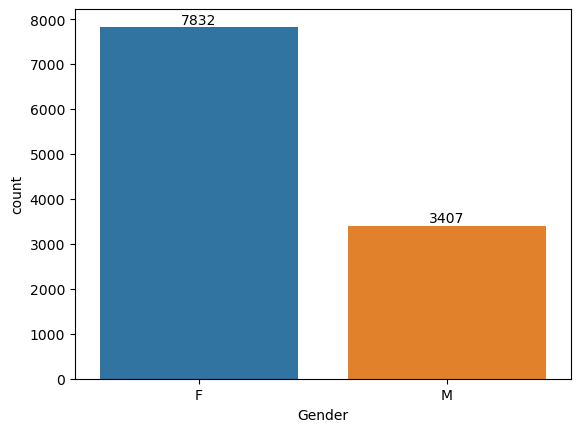

In [26]:
#bar chart for gender and its count

ax=sn.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

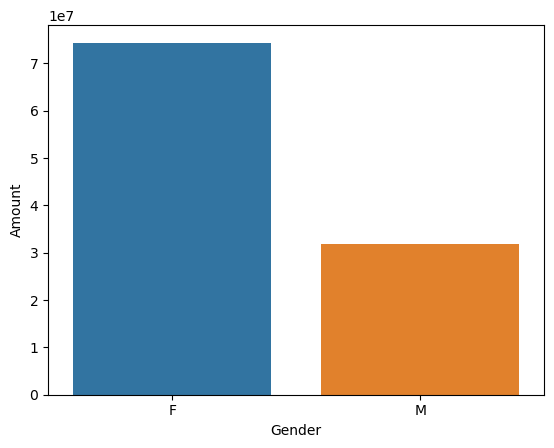

In [31]:
#ploting a bar chart for gender and vs total amount

sales=df.groupby(['Gender'],as_index=False)['Amount'].sum()

sn.barplot(x='Gender',y='Amount',data=sales)

From above graph we can see that most of the buyers are female and purchasing power of the females are greater than male

## Age

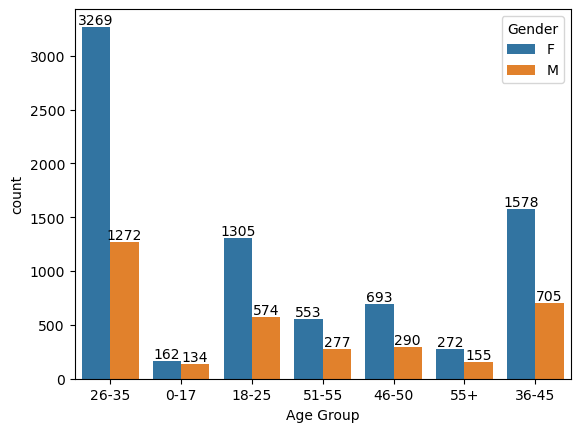

In [37]:
#barplot for age group and amount for male and female

ax=sn.countplot(x='Age Group',hue='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In above bar we can see that diffrent age group wise amount for both male and female.
By using this graph we can analyse that 26-35 age group and mostly female in this group are more active than others

<Axes: xlabel='Age Group', ylabel='Amount'>

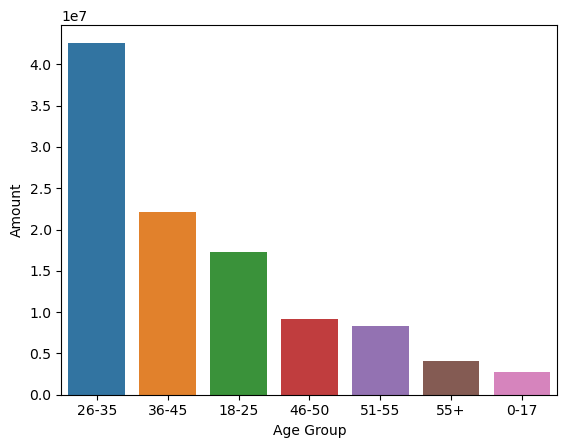

In [39]:
#bar chart of Amount and Age group 

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sn.barplot(x='Age Group',y='Amount',data=sales_age)

<Axes: xlabel='State', ylabel='Orders'>

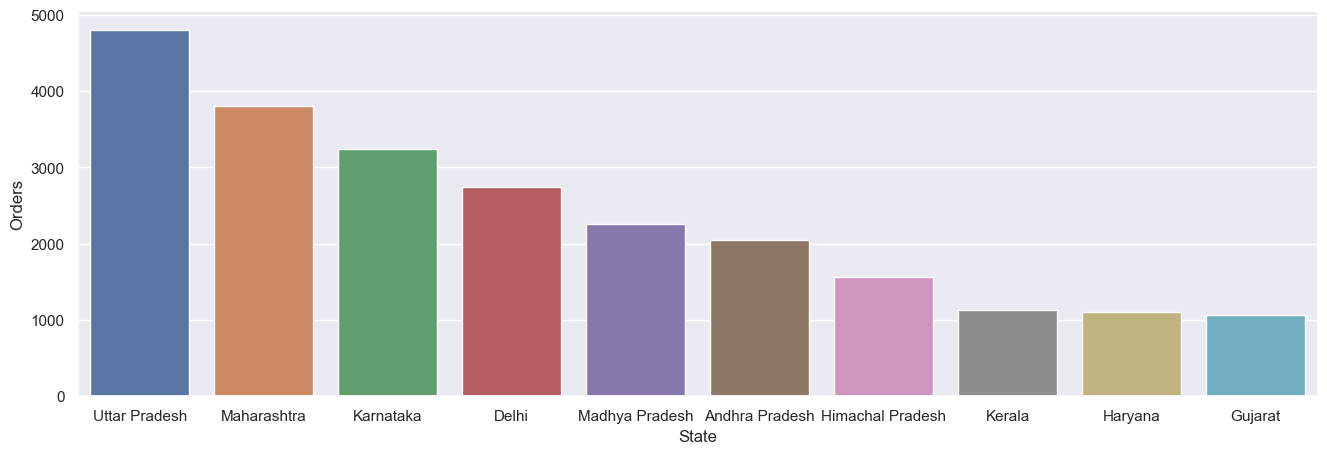

In [41]:
#bar plot of State and Orders

sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sn.set(rc={'figure.figsize':(16,5)}) #here we set figure size for better view

sn.barplot(x='State',y='Orders',data=sales_state)

From above bar chart we can see State wise orders fro diffrent state.
and we see that Uttar Pradesh having more orders than any other state

<Axes: xlabel='State', ylabel='Amount'>

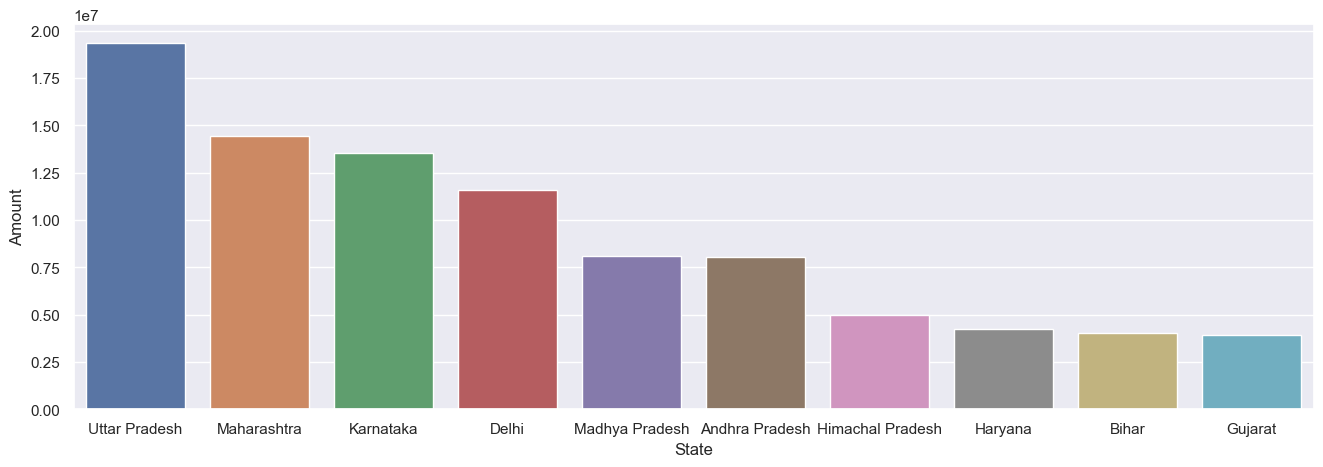

In [42]:
#total amount sales from top 10 state

sales_am=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sn.barplot(x='State',y='Amount',data=sales_am)

## marital status

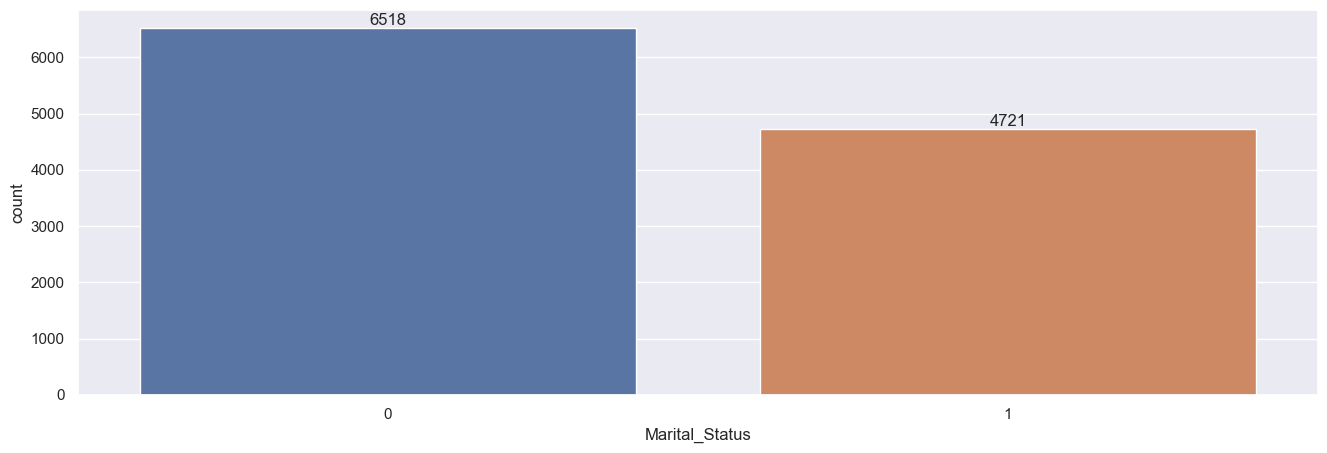

In [45]:
#bar chart on marital status

ax=sn.countplot(x='Marital_Status',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

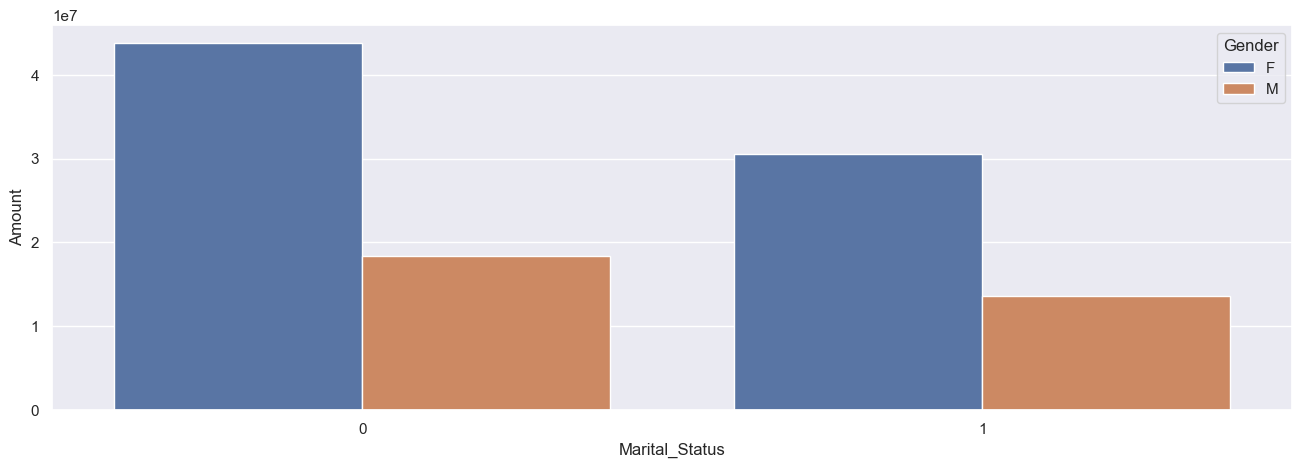

In [50]:
#barplot of marital status with gender and amount

sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sn.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_state)

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

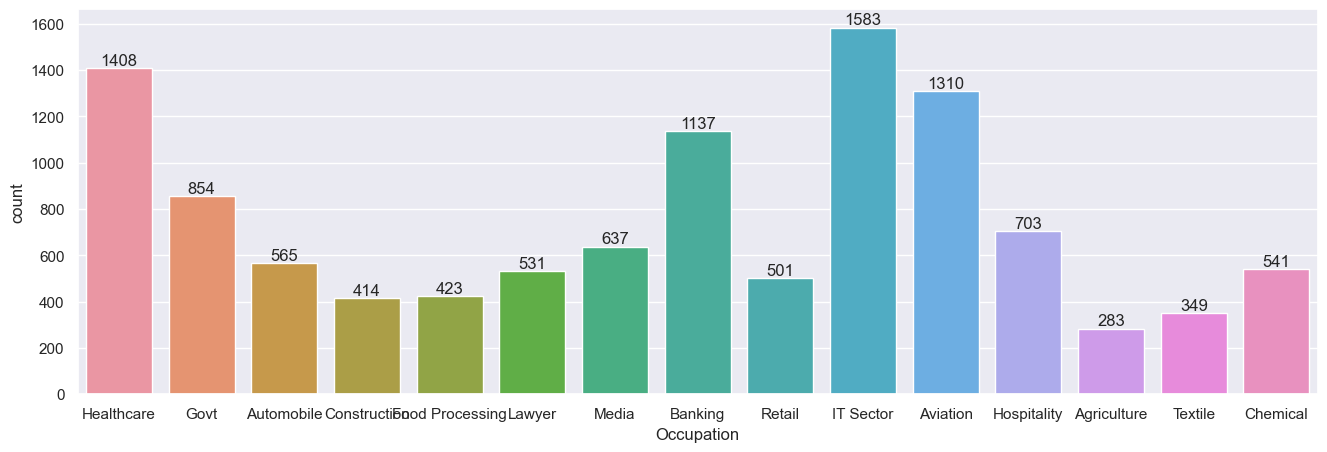

In [53]:
#barplot of occupation

ax=sn.countplot(x='Occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

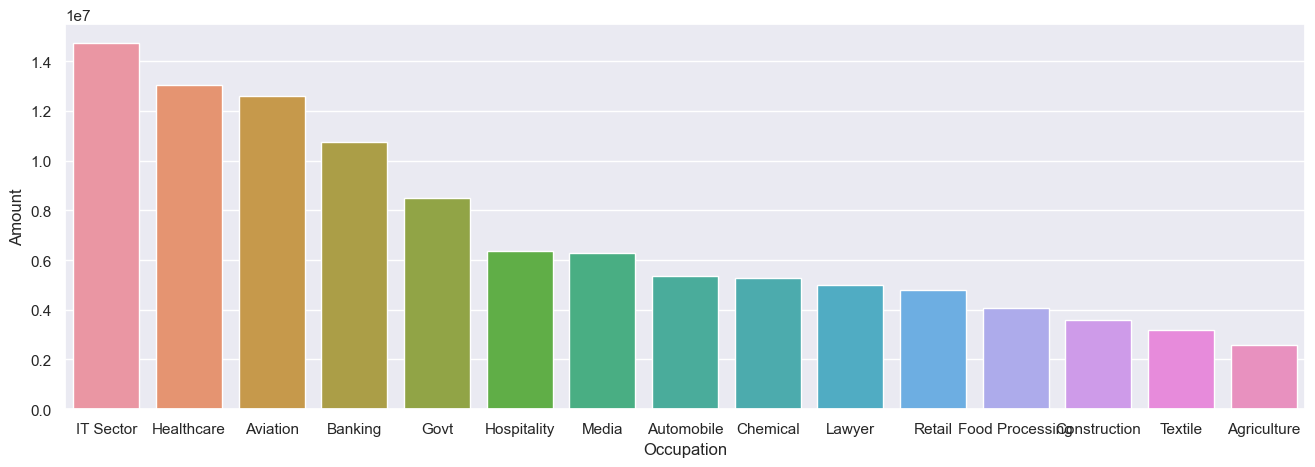

In [54]:
am_occu=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sn.barplot(x='Occupation',y='Amount',data=am_occu)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## product Category

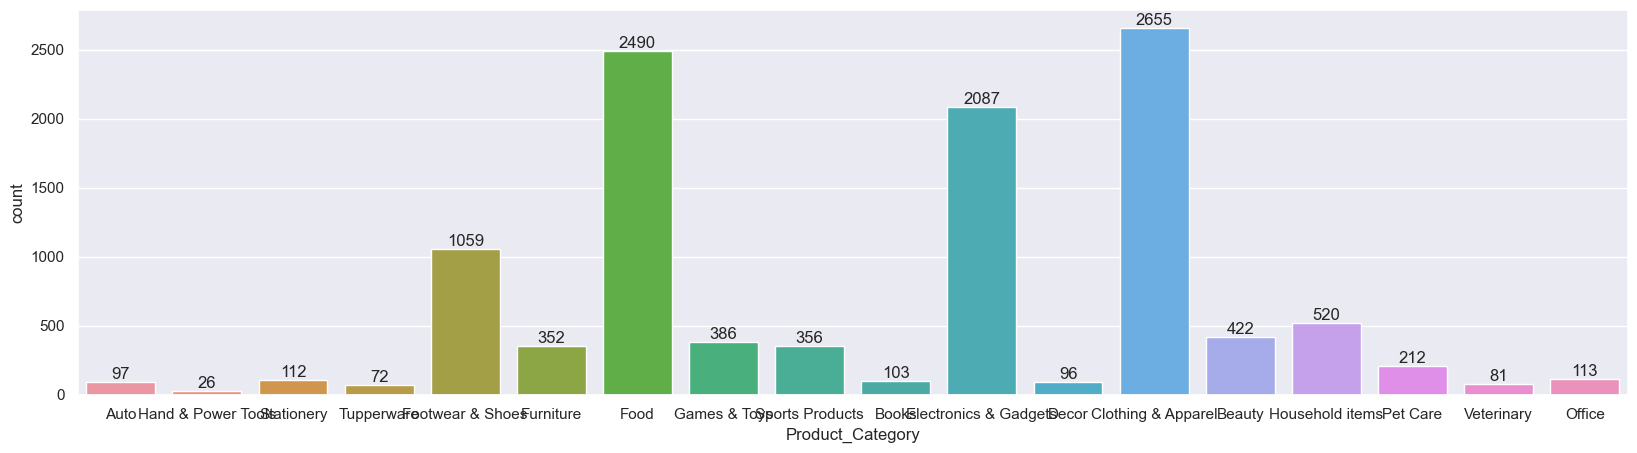

In [58]:
# bar plot of product category

ax=sn.countplot(x='Product_Category',data=df)

sn.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

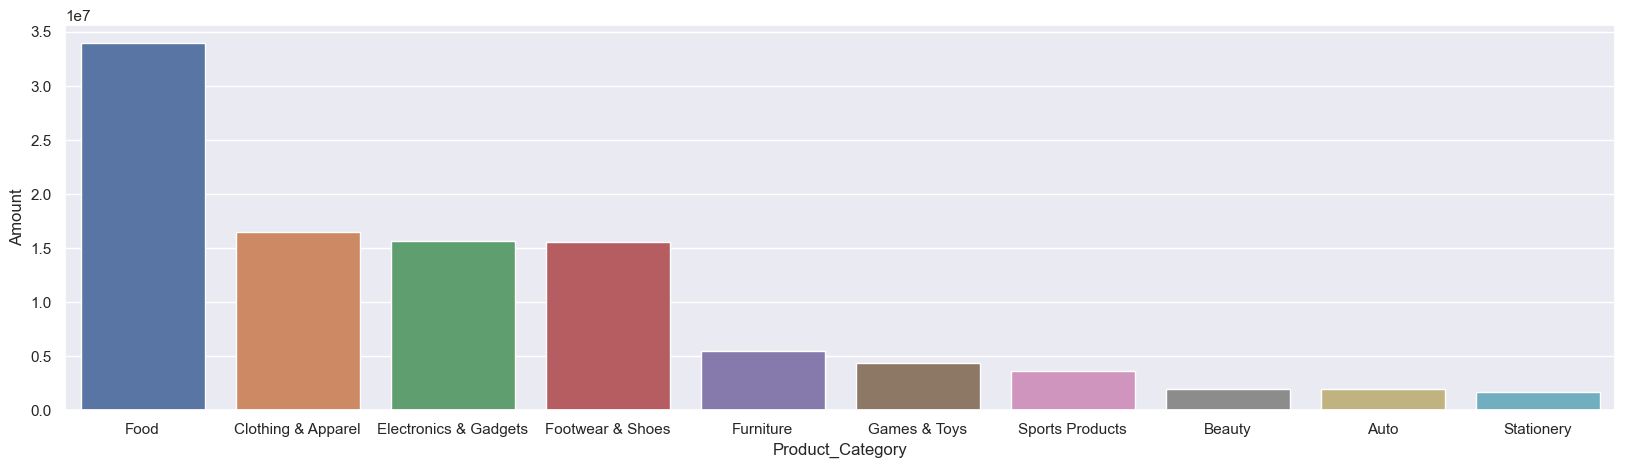

In [57]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sn.set(rc={'figure.figsize':(20,5)})

sn.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

## Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category